In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
from scipy import stats

C:\Users\Mi\Downloads\Anaconda\lib\site-packages\scipy\__init__.py:173: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Данные 


Есть данные о пользователях и их покупках некоторого e-ecom сервиса.Проводится тестирование нового способа оплаты.Для првоведения эксперимента были сформированны две группы пользователей. Необходимо выяснить увеличился ли средний чек во время проведения эксперимента.

In [3]:
groups =  pd.read_csv('C:\\Users\\Mi\\Desktop\\Республика\\groups.csv', sep=';')
group_add=pd.read_csv('C:\\Users\\Mi\\Desktop\\Республика\\group_add.csv', sep=',')
actv_st=  pd.read_csv('C:\\Users\\Mi\\Desktop\\Республика\\active_studs.csv', sep=',')
checks=   pd.read_csv('C:\\Users\\Mi\\Desktop\\Республика\\checks.csv', sep=';')

In [4]:
# Соединим данные пользоватлей

In [5]:
gr_fl=groups.merge(group_add, on=['id','grp'], how='outer')

In [6]:
# Всего 74576 пользователей про которых есть данные

In [7]:
gr_fl.count()

id     74576
grp    74576
dtype: int64

In [8]:
# Добавим группы к id пользователей которые зашли на платформу во время проведени эксперимента

In [9]:
actv_st=actv_st.rename(columns={"student_id":"id"})

In [10]:
act=actv_st.merge(gr_fl, on='id',how='left')

In [11]:
# Во время эксперимента на платформу зашло только 8341 пользователей 

In [12]:
act.count()

id     8341
grp    8341
dtype: int64

In [13]:
act.groupby('grp').count()

,id
grp,
A,1538
B,6803


In [14]:
# Добавим данные о продажах к активным пользователям

In [15]:
checks=checks.rename(columns={"student_id":"id"})

In [16]:
gr_checks=act.merge(checks,on='id',how='left')

In [17]:
# Есть значительные различия в медианных и средних показателях между группами

In [18]:
gr_checks.groupby('grp').agg({'id':'count','rev':['min','median','mean','max','std']})

id    rev                                         
    count    min  median         mean     max         std
grp                                                      
A    1538  199.0   585.0   933.589744  3660.0  919.932711
B    6803  199.0  1140.0  1257.878992  4650.0  790.864254

In [19]:
# Для того чтобы проверить статистическую значимость различий средних значений воспользуемся 

<AxesSubplot:xlabel='grp', ylabel='rev'>

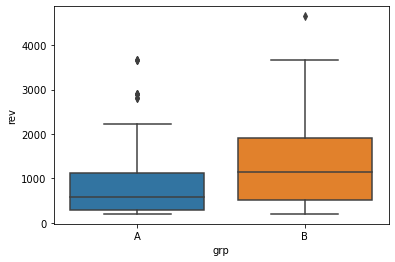

In [20]:
sns.boxplot(data=gr_checks,x="grp",y="rev")

Text(0.5, 0.98, 'B group')

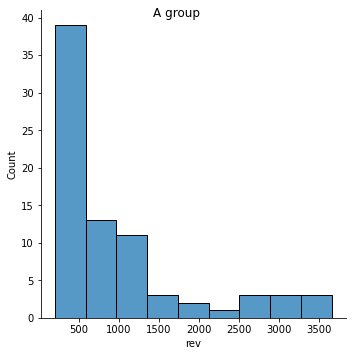

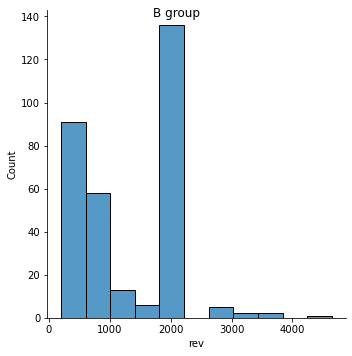

In [38]:
sns.displot(gr_checks[gr_checks.grp=="A"].rev).fig.suptitle('A group')
sns.displot(gr_checks[gr_checks.grp=="B"].rev).fig.suptitle('B group')


In [22]:
# как выглядит распределение покупок для тех пользователей(из обеих групп) которые не принимали участия в эксперименте?

In [23]:
others = pd.merge(groups,act, indicator=True, how='outer')\
         .query('_merge=="left_only"')\
         .drop('_merge', axis=1)

In [24]:
others=others.merge(checks,on='id',how='left')
others.count()

id     66156
grp    66156
rev      149
dtype: int64

Text(0.5, 0.98, 'B group')

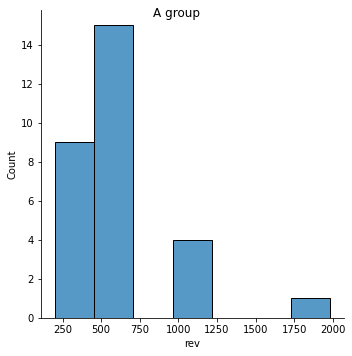

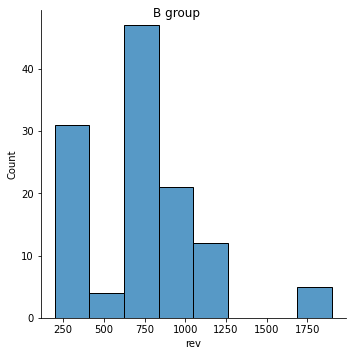

In [39]:
sns.displot(others[others.grp=="A"].rev).fig.suptitle('A group')
sns.displot(others[others.grp=="B"].rev).fig.suptitle('B group')

In [26]:
others.groupby('grp').agg({'id':'count','rev':['min','median','mean','max','std']})

id    rev                                          
     count    min median        mean        max         std
grp                                                        
A    13136  199.0  690.0  664.689655  1980.0000  371.793347
B    53020  199.0  690.0  718.800001  1900.0001  381.133906

In [27]:
# У пользователей из обоих групп, которые не заходили на платформу во время эксперимента
# нет значимых различий в среднеи и медианном значении покупок

In [28]:
others[others.grp=='A'].rev.dropna() 
others[others.grp=='B'].rev.dropna()
others['rev_a_log']=np.log(others[others.grp=='A'].rev.dropna())
others['rev_b_log']=np.log(others[others.grp=='B'].rev.dropna())

In [29]:
stats.ttest_ind(others[others.rev>0].rev_a_log.dropna(),others[others.rev>0].rev_b_log.dropna(),equal_var=True)

Ttest_indResult(statistic=-0.5737062472036497, pvalue=0.5670433139460413)

In [30]:
# нет статзначимых различий между логарифмами выручки для разных груп неучаствовавших в эесперименте

In [45]:
stats.ttest_ind(gr_checks[gr_checks.grp=="A"].rev.dropna(),gr_checks[gr_checks.grp=="B"].rev.dropna(),
               equal_var=True)

Ttest_indResult(statistic=-3.1337795050930985, pvalue=0.0018562025265765867)

In [37]:
# В тестовой выборке есть статзначимые различия между средними  ~ значит изменение системы оплаты позволило
# Увеличить средний чек